In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import math

In [6]:
xl = pd.ExcelFile(r"C:\Users\Cirrolytix\Downloads\linear_python.xlsx")

In [7]:
xl

In [8]:
df = xl.parse("Sheet1")

In [9]:
df

,period,sales_a,sales_b,price_a,price_b,ads_b,influencers_b,period.1,set
0,1,45.454545,679548.408057,44.00,61.56,531000,93000,1,Train
1,2,51919.228670,620905.137703,54.97,62.09,399000,0,2,Test
2,3,158308.494784,527152.744246,53.68,62.13,282000,0,3,Test
3,4,206347.693481,401672.025723,52.46,62.20,256000,15000,4,Train
4,5,281893.004115,340984.883902,43.74,64.17,297000,0,5,Train
5,6,331328.187384,283159.328189,37.57,66.09,193000,0,6,Test
6,7,376942.496494,243670.886076,35.65,66.36,195000,76000,7,Test
7,8,378894.901737,202938.971360,35.11,66.69,120000,0,8,Test
8,9,434965.831435,200334.295700,35.12,65.81,72000,0,9,Test
9,10,425606.936416,172570.390554,34.60,66.06,157000,19000,10,Test


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
train = df.loc[df['set'] == 'Train']
test = df.loc[df['set'] == 'Test']
# Split dataset into Train and Test

In [48]:
ind_var = train[["sales_a", "price_a", "price_b", "ads_b", "influencers_b"]]
# Identify the independent variables

In [49]:
lm.fit(ind_var, train.sales_b)
# Perform the Linear Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
lm.intercept_
# Derive intercept

-161465.85128020367

In [33]:
lm.coef_
# Derive coefficients

array([ 7.60955937e+03, -1.86974566e+02,  7.27683956e-01,  5.55005967e-01])

In [34]:
pd.DataFrame(list(zip(ind_var.columns, lm.coef_)), columns = ['features', 'coefficients'])
# Derive coefficients with column names

,features,coefficients
0,price_a,7609.559369
1,price_b,-186.974566
2,ads_b,0.727684
3,influencers_b,0.555006


In [50]:
lm.score(ind_var, train.sales_b) # Derive R-Square

0.974632600179567

In [37]:
pred = lm.predict(ind_var) # Derive predicted values of Y using independent variables

In [38]:
pred

array([599860.34234235, 420713.99753557, 375500.25263666, 170141.53731099,
       165052.8917293 ,  81892.00375893,  70321.57585532,  79978.52964185,
        72757.78245035, 170369.88241398,  49963.42515386,  46820.50488632,
        44105.37020682,  53363.91817636,  52363.80715442,  66937.88063633,
        63593.02604546,  12251.20183429,  14353.83227291,  88088.98619558,
        74284.31420909,  12481.86124952,  29123.79101165,  42660.69502402,
        17836.78709078,  11889.29914299])

In [51]:
ind_var_test = test[["sales_a", "price_a", "price_b", "ads_b", "influencers_b"]]

In [52]:
lm.score(ind_var_test, test.sales_b)

0.96381629510622

In [53]:
lm.predict(ind_var_test)

array([586089.5560544 , 474043.22270861, 249580.64539696, 232849.42346341,
       187998.58697781, 136156.42823057, 162431.91219631, 163882.75125539,
       134688.23555471, 168600.75063151,  63622.67381583,  76085.45314296,
        73179.62216975,  84913.42390983,  61333.32567734,  42834.66236596,
        44246.20835799,  27133.66357463,  71055.47722012,  11875.30644753,
        42719.4647248 ,  25936.41254921,  34003.63546495,  30660.23281043])

Text(0.5,1,'Predicted vs. Actual Sales')

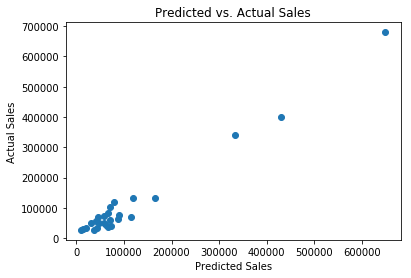

In [56]:
plt.scatter(lm.predict(ind_var), train.sales_b)
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.title("Predicted vs. Actual Sales")

Text(0.5,1,'Predicted vs. Actual Sales')

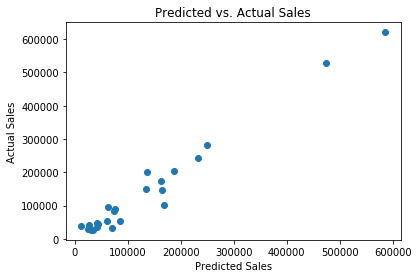

In [57]:
plt.scatter(lm.predict(ind_var_test), test.sales_b)
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.title("Predicted vs. Actual Sales")

In [59]:
pred_test = lm.predict(ind_var_test)

In [62]:
output_test = ind_var_test.join(pd.DataFrame(pred_test))


In [67]:
ind_var_test.shape

(24, 5)

In [68]:
lm.predict(ind_var_test).shape

(24,)

In [69]:
output_test = pd.DataFrame(lm.predict(ind_var_test))

In [70]:
output_test.shape

(24, 1)

In [80]:
output_test = pd.DataFrame.reset_index(ind_var_test).join(pd.DataFrame(lm.predict(ind_var_test)))
output_test.rename(columns={0: 'pred_sales_b'})

,index,sales_a,price_a,price_b,ads_b,influencers_b,pred_sales_b
0,1,51919.228670,54.97,62.09,399000,0,586089.556054
1,2,158308.494784,53.68,62.13,282000,0,474043.222709
2,5,331328.187384,37.57,66.09,193000,0,249580.645397
3,6,376942.496494,35.65,66.36,195000,76000,232849.423463
4,7,378894.901737,35.11,66.69,120000,0,187998.586978
5,8,434965.831435,35.12,65.81,72000,0,136156.428231
6,9,425606.936416,34.60,66.06,157000,19000,162431.912196
7,10,404534.883721,34.40,66.27,110000,0,163882.751255
8,11,455940.594059,34.34,66.82,203000,0,134688.235555
9,15,430784.508441,30.21,69.53,60000,158000,168600.750632
